In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Salary_Data.csv')

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
x = df['YearsExperience'].values
y = df['Salary'].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

x_train.shape

(24,)

In [ ]:
x_train

array([ 9.6,  4. ,  5.3,  7.9,  2.9,  5.1,  3.2,  4.5,  8.2,  6.8,  1.3,
       10.5,  3. ,  2.2,  5.9,  6. ,  3.7,  3.2,  9. ,  2. ,  1.1,  7.1,
        4.9,  4. ])

In [ ]:
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
a = lr.coef_
c = lr.intercept_
lr.n_features_in_

1

In [ ]:
print(f"The equation of the model is: {a[0]} X YearsExperience + {c}")

The equation of the model is: 9312.575126729189 X YearsExperience + 26780.09915062818


In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
print(f"The predicted values are: {y_pred}")
print(f"The actual values are: {y_test}")

The predicted values are: [ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]
The actual values are: [ 37731. 122391.  57081.  63218. 116969. 109431.]


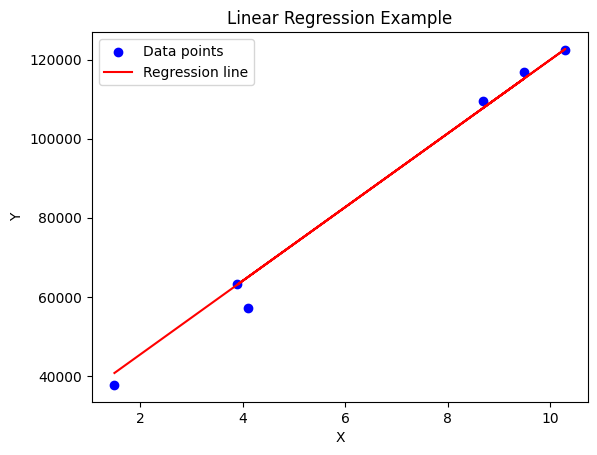

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test, color='blue', label='Data points')

# Plotting the regression line
plt.plot(x_test, y_pred, color='red', label='Regression line')

# Adding labels and a title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Example')
plt.legend()

# Show the plot
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

12823412.298126549
2446.1723690465055


In [ ]:
import scipy.stats as stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
# Outputting the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R_value: {r_value}")
print(f"P_value: {p_value}")
print(f"Standard Error (stderr): {std_err}")

Slope: 9449.96232145508
Intercept: 25792.20019866868
R_value: 0.9782416184887599
P_value: 1.1430681092271558e-20
Standard Error (stderr): 378.75457423882153


In [ ]:
import numpy as np

# Normalize x_train and y_train
def normalize(data):
    return (data - np.mean(data)) / np.std(data)

In [ ]:
x_train_normalized = normalize(x_train)
# y_train_normalized = normalize(y_train)

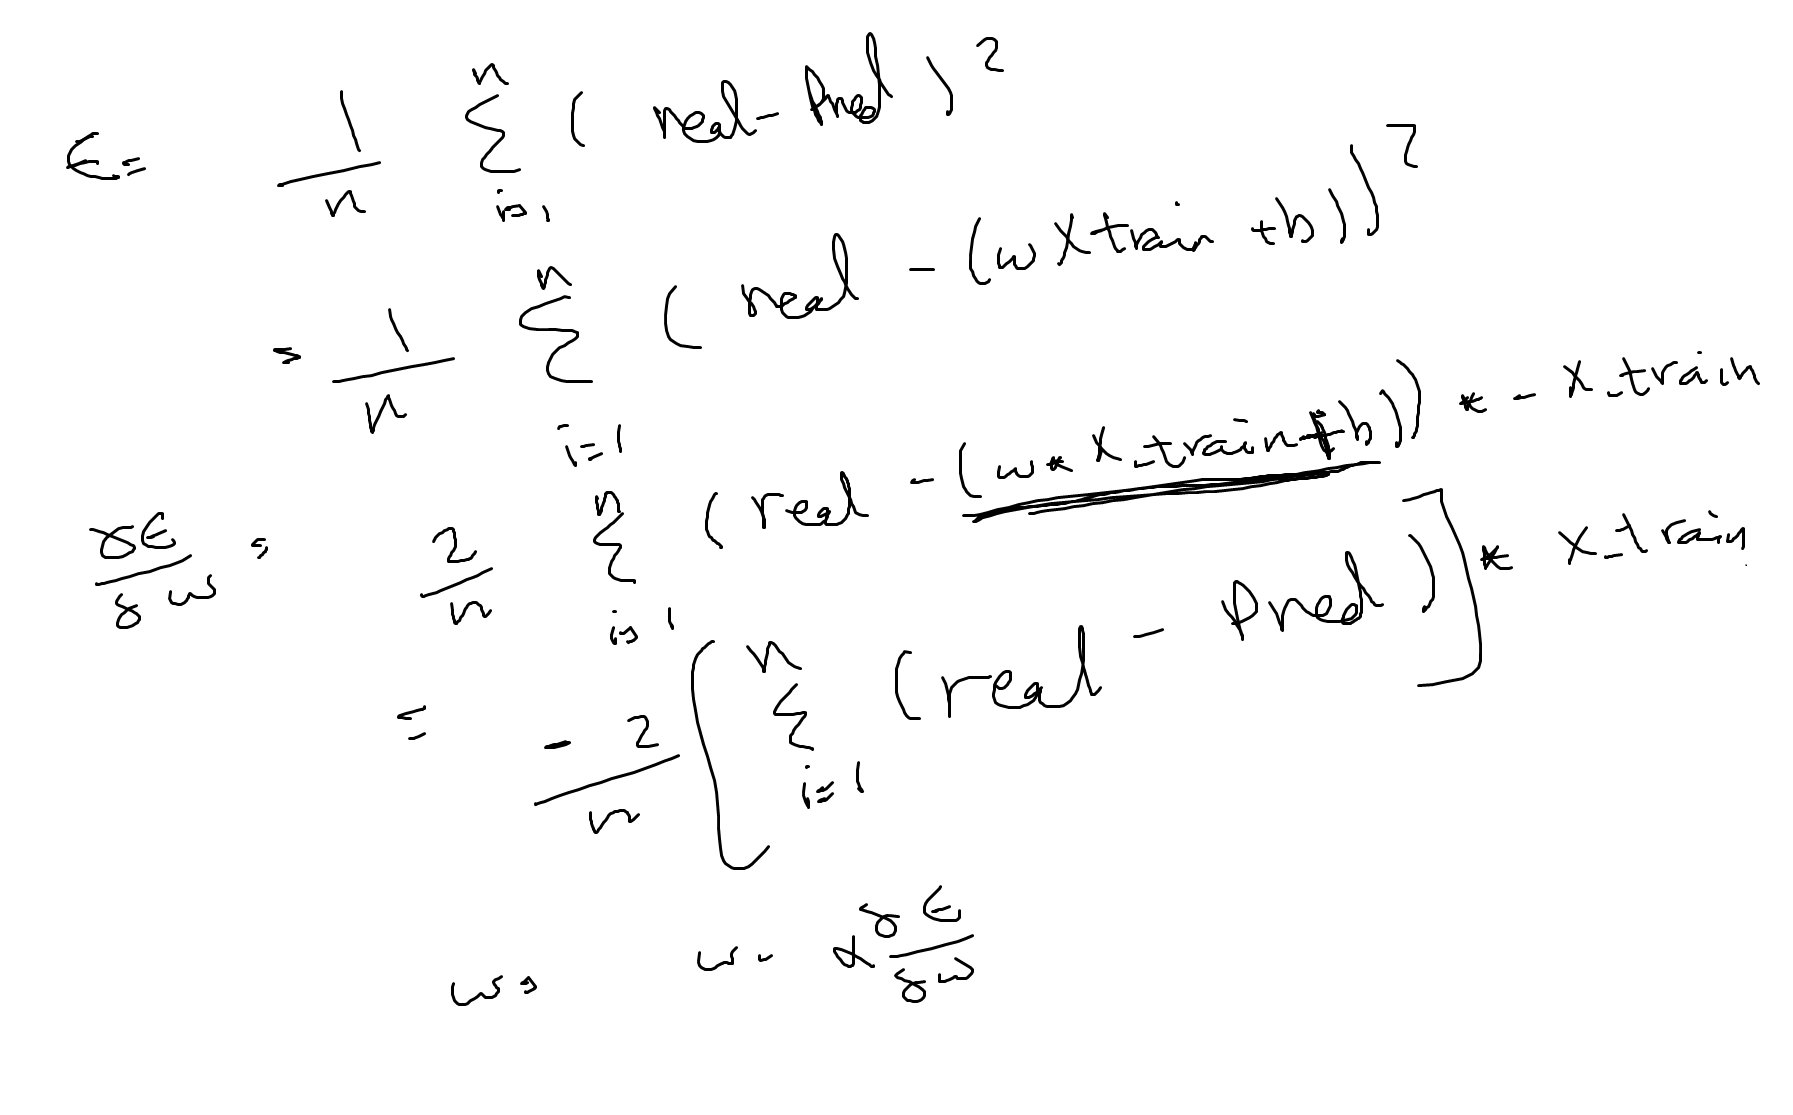

In [ ]:
def linear_regression(x_train, y_train, epochs=1000, learning_rate=0.001):
    # Initialize weight (w) and bias (b) to zero
    w = 0.0
    b = 0.0

    n = len(x_train)

    # Gradient Descent loop
    for epoch in range(epochs):
        # Make predictions
        y_pred = w * x_train + b

        # Calculate the gradients
        dw = -(2/n) * np.sum(x_train * (y_train - y_pred))
        db = -(2/n) * np.sum(y_train - y_pred)

        # Update parameters using gradients
        w -= learning_rate * dw
        b -= learning_rate * db

        # Optional: Print the loss for every 100 epochs
        if epoch % 100 == 0:
            mse = np.mean((y_train - y_pred) ** 2)
            print(f"Epoch {epoch}: MSE = {mse:.4f}, w = {w:.4f}, b = {b:.4f}")

    return w, b

In [ ]:
w, b = linear_regression(x_train_normalized, y_train)

print(f"Final model: y = {w:.4f} * x + {b:.4f}")

Epoch 0: MSE = 6073909419.7083, w = 48.1077, b = 147.7724
Epoch 100: MSE = 4081760333.6923, w = 4403.5473, b = 13526.3725
Epoch 200: MSE = 2746917623.8010, w = 7968.7655, b = 24477.6504
Epoch 300: MSE = 1852504111.9521, w = 10887.1348, b = 33442.0029
Epoch 400: MSE = 1253200894.9889, w = 13276.0150, b = 40779.9243
Epoch 500: MSE = 851636807.3444, w = 15231.4730, b = 46786.5032
Epoch 600: MSE = 582568142.3990, w = 16832.1461, b = 51703.2893
Epoch 700: MSE = 402278249.2461, w = 18142.4039, b = 55728.0072
Epoch 800: MSE = 281474715.3984, w = 19214.9375, b = 59022.5076
Epoch 900: MSE = 200530112.5985, w = 20092.8779, b = 61719.2764
Final model: y = 20805.0331 * x + 63906.8029


In [ ]:
def predict(x, w, b):
    return w * x + b

x_test_normalized = normalize(x_test)
# Example usage with training data
y_test_pred = predict(x_test_normalized, w, b)
print(y_test_pred)
print(y_test)

[33502.95492945 88858.92638756 49858.1283148  48600.03805439
 83826.56534591 78794.20430427]
[ 37731. 122391.  57081.  63218. 116969. 109431.]


# Multiple Linear Regression

# Read Dataset

In [ ]:
df = pd.read_csv(r'/content/multiple_linear_regression_dataset.csv')

# Explore Dataset

In [ ]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes


# Dataset Cleaning

In [ ]:
df.isnull().sum()

,0
age,0
experience,0
income,0


# Split Data to Features and Labels

In [ ]:
x = df.iloc[:, 0:-1]
# x = df.drop('income', axis = 1)
y = df['income']
# y = df.iloc[:, -1]

In [ ]:
x.head()

,age,experience
0,25,1
1,30,3
2,47,2
3,32,5
4,43,10


In [ ]:
y.head()

,income
0,30450
1,35670
2,31580
3,40130
4,47830


# Split to Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_train = poly.fit_transform(x_train)
x_test = poly.transform(x_test)

In [ ]:
x_train.astype(int)

array([[   1,   37,   10, 1369,  370,  100],
       [   1,   37,    5, 1369,  185,   25],
       [   1,   29,    1,  841,   29,    1],
       [   1,   23,    1,  529,   23,    1],
       [   1,   28,    5,  784,  140,   25],
       [   1,   51,    4, 2601,  204,   16],
       [   1,   43,   10, 1849,  430,  100],
       [   1,   47,    2, 2209,   94,    4],
       [   1,   51,    7, 2601,  357,   49],
       [   1,   44,   12, 1936,  528,  144],
       [   1,   39,    8, 1521,  312,   64],
       [   1,   33,    4, 1089,  132,   16],
       [   1,   58,   17, 3364,  986,  289],
       [   1,   47,    9, 2209,  423,   81],
       [   1,   32,    5, 1024,  160,   25],
       [   1,   25,    1,  625,   25,    1],
       [   1,   41,    6, 1681,  246,   36],
       [   1,   54,    5, 2916,  270,   25]])

In [ ]:
xx = pd.DataFrame({'a': [1, 2, 3, 4, 5],
                 'b': [6, 7, 8, 9, 10]})

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
xx = poly.fit_transform(xx)
xx.astype(int)

array([[   1,    1,    6,    1,    6,   36,    1,    6,   36,  216],
       [   1,    2,    7,    4,   14,   49,    8,   28,   98,  343],
       [   1,    3,    8,    9,   24,   64,   27,   72,  192,  512],
       [   1,    4,    9,   16,   36,   81,   64,  144,  324,  729],
       [   1,    5,   10,   25,   50,  100,  125,  250,  500, 1000]])

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
a = lr.coef_
c = lr.intercept_
print(a)
print(c)

[   0.         -572.06712686 2658.60110031    6.07259654   -3.71468391
  -17.52018533]
38827.48304190258


In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
print(y_pred)
print(y_test)

[46450.33642703 34614.60620467]
18    44190
1     35670
Name: income, dtype: int64


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

3111488.4133008015
1657.8651111834552
